In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import networkx as nx

plt.style.use('ggplot')
plt.rcParams['figure.dpi'] = 300

# Read the data
df = pd.read_csv('compiled phase b.csv')

# Multiple Bar Chart
plt.figure(figsize=(9, 5))
models = ['Elo', 'Four Factors', 'Temporal', 'Pagerank']
x = np.arange(len(df))
width = 0.2

for i, model in enumerate(models):
    plt.bar(x + (i - 1.5) * width, df[model], width, label=model)

plt.xlabel('Game ID')
plt.ylabel('Win Probability for Home Team')
plt.title('Win Probabilities by Different Models')
plt.xticks(x, df['game_id'], rotation=15)
plt.legend(loc='upper right')
plt.tight_layout()

plt.tight_layout()
plt.subplots_adjust(bottom=0.25)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Calculate absolute differences between model predictions
agreement_matrix = np.zeros((10, 4, 4))

# Create labels for plot
models = ['Elo', 'Four Factors', 'Temporal', 'Pagerank']
games = df['game_id'].tolist()

# Fill the agreement matrix
for i, game in enumerate(games):
    game_row = df[df['game_id'] == game].iloc[0]
    for j, model1 in enumerate(models):
        for k, model2 in enumerate(models):
            # Agreement is inverse of difference (closer to 1 = more agreement)
            agreement_matrix[i, j, k] = 1 - abs(game_row[model1] - game_row[model2])

# Average agreement per game
avg_agreement = np.mean(agreement_matrix, axis=(1, 2))

# Create the heatmap visualization
plt.figure(figsize=(9, 5))
# Create a diverging color palette - blue to red
cmap = sns.diverging_palette(10, 120, as_cmap=True, center="light")

# Reshape data for display
heatmap_data = pd.DataFrame()
for i, model1 in enumerate(models):
    for j, model2 in enumerate(models):
        if i < j:  # Only use upper triangle
            col_name = f"{model1} vs {model2}"
            heatmap_data[col_name] = [agreement_matrix[g, i, j] for g in range(10)]

heatmap_data.index = games

# Create the heatmap
sns.heatmap(heatmap_data, annot=True, cmap=cmap, vmin=0, vmax=1, 
            linewidths=.5, fmt='.2f', cbar_kws={'label': 'Agreement Score'}, 
            xticklabels=heatmap_data.columns, yticklabels=heatmap_data.index)
plt.xticks(rotation=15)
            
plt.title('Model Consensus Heatmap (Higher = More Agreement)', fontsize=14)
plt.ylabel('Game ID')
plt.tight_layout()
plt.savefig('model_agreement_heatmap.png', dpi=300)
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

def create_data_flowchart():
    # Create the flowchart
    fig, ax = plt.subplots(figsize=(14, 8), facecolor='white')
    ax.set_xlim(0, 14)
    ax.set_ylim(0, 10)
    ax.axis('off')
    
    # Define flowchart elements - (x, y, width, height, text, color)
    elements = [
        # Input data
        (7, 9, 6, 1, "NCAA Women's Basketball Dataset\n5,300+ games from 2022 season", '#c6e2ff'),
        
        # Data cleaning and preprocessing
        (4, 7, 3, 1.2, "Data Cleaning\n• Add East region teams\n• Sort by game_date\n• Impute missing values", '#ffd699'),
        (10, 7, 3, 1.2, "Feature Engineering\n• home_away_NS encoding\n• margin of victory\n• Rest & travel metrics", '#d5f5e3'),
        
        # Model branches
        (2, 4.5, 2.5, 1, "ELO Rating System\nK=32, BASE=1500", '#ffe6e6'),
        (5.5, 4.5, 2.5, 1, "Four Factors Model\nOliver's Method", '#e6e6ff'),
        (9, 4.5, 2.5, 1, "Temporal Logistic\nTime-aware ML", '#f9e6ff'),
        (12.5, 4.5, 2.5, 1, "PageRank Method\nNetwork Analysis", '#e6fff7'),
        
        # Outputs
        (4, 2.5, 4, 1, "Phase 1a: Regional Team Rankings\n(North, South, West, East)", '#ffffd1'),
        (10, 2.5, 4, 1, "Phase 1b: East Region Game Predictions", '#ffffd1'),
        
        # Consensus
        (7, 0.8, 6, 1, "Multi-Model Consensus via Median Probabilities", '#ffcfd1')
    ]
    
    # Draw elements
    for x, y, w, h, text, color in elements:
        rect = patches.Rectangle((x-w/2, y-h/2), w, h, linewidth=1, 
                                edgecolor='black', facecolor=color, alpha=0.8,
                               )
        ax.add_patch(rect)
        ax.text(x, y, text, ha='center', va='center', fontsize=10, 
               linespacing=1.3, fontweight='bold')
    
    # Define arrows connecting the elements
    arrows = [
        # Data to preprocessing
        (7, 8.4, 4, 7.6),
        (7, 8.4, 10, 7.6),
        
        # Preprocessing to models
        (4, 6.3, 2, 5.1),
        (4, 6.3, 5.5, 5.1),
        (10, 6.3, 9, 5.1),
        (10, 6.3, 12.5, 5.1),
        
        # Models to outputs
        (2, 3.9, 4, 3.1),
        (5.5, 3.9, 4, 3.1),
        (9, 3.9, 10, 3.1),
        (12.5, 3.9, 10, 3.1),
        
        # Outputs to consensus
        (4, 1.9, 7, 1.4),
        (10, 1.9, 7, 1.4)
    ]
    
    # Draw arrows
    for x1, y1, x2, y2 in arrows:
        ax.annotate('', xy=(x2, y2), xytext=(x1, y1),
                   arrowprops=dict(facecolor='black', shrink=0.05, 
                                  width=1.5, headwidth=8, alpha=0.7))
    
    plt.title('Data Processing and Analysis Workflow', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.savefig('data_prep_flowchart.png', dpi=300, bbox_inches='tight')
    plt.close()
    
    return "Data preparation flowchart created"

# Call the function
create_data_flowchart()


'Data preparation flowchart created'

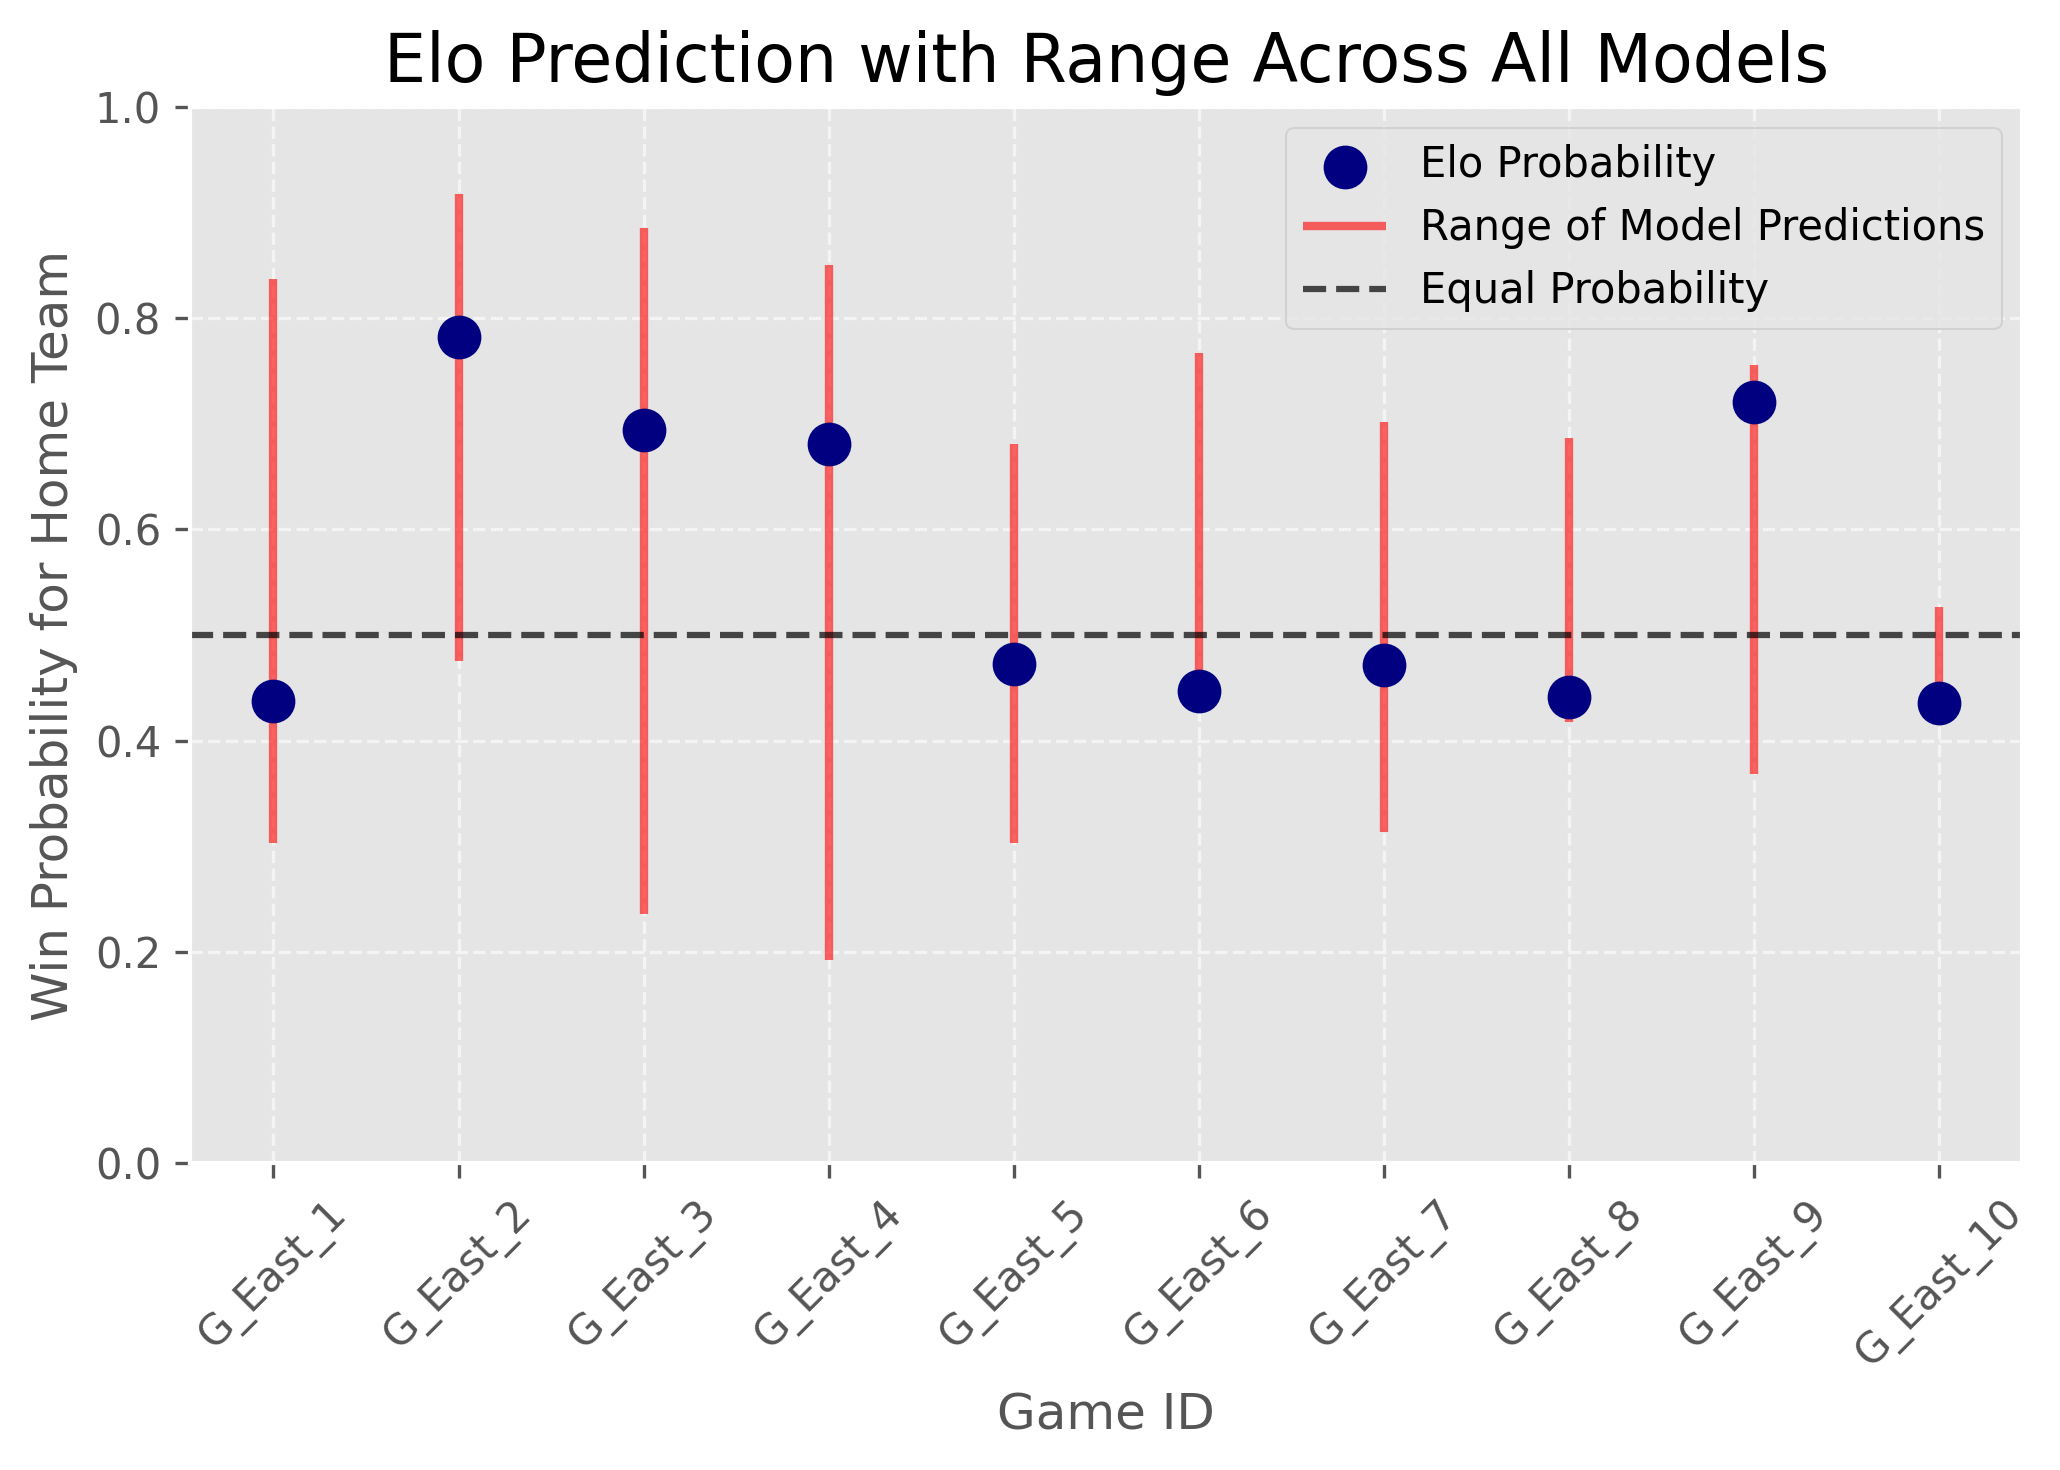

In [ ]:
# Create a dot chart with error bars showing the range of predictions
plt.figure(figsize=(7, 5))

# Extract data
game_ids = df['game_id'].tolist()
elo_probs = df['Elo'].values
min_probs = df[models].min(axis=1).values
max_probs = df[models].max(axis=1).values

# Create x positions
x = np.arange(len(game_ids))

# Plot Elo probabilities as dots
plt.scatter(x, elo_probs, color='navy', s=100, zorder=3, label='Elo Probability')

# Add error bars showing range of predictions across all models
plt.vlines(x, min_probs, max_probs, color='red', alpha=0.6, linewidth=2, 
           label='Range of Model Predictions')

# Add horizontal line at 0.5 (equal probability)
plt.axhline(y=0.5, color='black', linestyle='--', alpha=0.7, label='Equal Probability')

# Format the plot
plt.xlabel('Game ID', fontsize=12)
plt.ylabel('Win Probability for Home Team', fontsize=12)
plt.title('Elo Prediction with Range Across All Models', fontsize=16)
plt.xticks(x, game_ids, rotation=45)
plt.ylim(0, 1)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

plt.tight_layout()
plt.savefig('elo_prediction_range.png', dpi=300)
plt.show()